#  <center> Домашняя работа 1.2

## <center> Часть 2.
#### С помощью функций sklearn.metrics.auc, precision, recall составить функцию для расчёта ROC-AUC, ROC-PRC

In [1]:
from sklearn.metrics import recall_score, precision_score, precision_recall_curve, roc_auc_score, auc, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
%config InlineBackend.figure_format = 'svg'

In [2]:
y_proba = np.random.sample(10)
y_true = np.random.randint(0, 2, 10)

### Напишим функцию для расчета  ROC-PRC и сравним результат с функцией из sklearn.metrics.

In [3]:
def AUC_PRC(y_true, y_proba, pos_label=1):
    """
    Функция принимает на вход две переменные: 
    массив реальных значений y_true
    и массив оценок принадлежности к классу 1 y_proba,
    a также значение положительного исхода (int).

    
    Возвращает:
    Массив значений recall.
    Массив значений precision.
    Площадь по PRC кривой.
    
    """
    recall = [0]
    precision = [1]
    concatenated = np.concatenate([y_true, y_proba]).reshape(2, len(y_true)).T
    concatenated = concatenated[concatenated[:,1].argsort()][::-1]
    
    co_list = list(concatenated[:, 0])
    
    for i in range(1, len(y_true)+1):
        
        recall.append(co_list[:i].count(pos_label)/co_list.count(pos_label))
        precision.append(co_list[:i].count(pos_label)/(len(concatenated[:, 0][:i])))

    return np.array(recall), np.array(precision), auc(np.array(recall), np.array(precision))

In [4]:
recall_ = AUC_PRC(y_true, y_proba)[0]

In [5]:
precision_ = AUC_PRC(y_true, y_proba)[1]

In [6]:
AUC = AUC_PRC(y_true, y_proba)[2]
print('Площадь под PRC-кривой: {:.4f}'.format(AUC))

Площадь под PRC-кривой: 0.8582


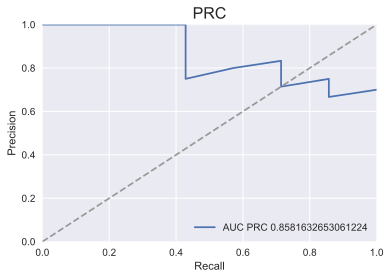

In [7]:
plt.plot(recall_, precision_, label='AUC PRC {0}'.format(auc(recall_, precision_)))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PRC', size=16)
plt.legend(loc='lower right')
plt.show()

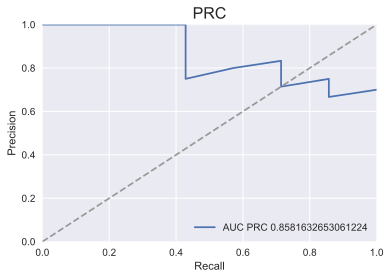

In [8]:
precision, recall, _ = precision_recall_curve(y_true, y_proba)
plt.plot(recall, precision, label='AUC PRC {0}'.format(auc(recall, precision)))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PRC', size=16)
plt.legend(loc='lower right')
plt.show()

### Видно, что результаты совпали. Теперь создадим функцию для расчета ROC-AUC.

In [9]:
def ROC_AUC(y_true, y_proba, pos_label=1):
    """
    Функция принимает на вход две переменные: 
    массив реальных значений y_true
    и массив оценок принадлежности к классу 1 y_proba,
    a также значение положительного исхода (int).
    
    Возвращает:
    Массив значений fpr.
    Массив значений tpr.
    Площадь по ROC кривой.
    
    """
    
    concatenated = np.concatenate([y_true, y_proba]).reshape(2, len(y_true)).T
    concatenated = concatenated[concatenated[:,1].argsort()][::-1]

    count_1 = list(concatenated[:, 0]).count(pos_label)
    count_0 = len(y_true) - count_1
     
    tpr = 0
    fpr = 0
    tpr_list = []
    fpr_list = []

    for i in range(0, len(y_true)):
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        if concatenated[:, 0][i] == pos_label:
            tpr += 1/count_1
        else:
            fpr += 1/count_0
            
    fpr_ = np.array(fpr_list)
    tpr_ = np.array(tpr_list)
    
    return fpr_, tpr_, auc(fpr_, tpr_)

In [10]:
fpr_ = ROC_AUC(y_true, y_proba)[0]
tpr_ = ROC_AUC(y_true, y_proba)[1]
roc_auc = ROC_AUC(y_true, y_proba)[2]

In [11]:
print('Площадь под RO-кривой: {:.4f}'.format(roc_auc))

Площадь под RO-кривой: 0.6667


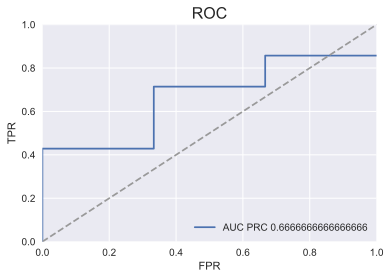

In [12]:
plt.plot(fpr_, tpr_, label='AUC PRC {0}'.format(roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC', size=16)
plt.legend(loc='lower right')
plt.show()

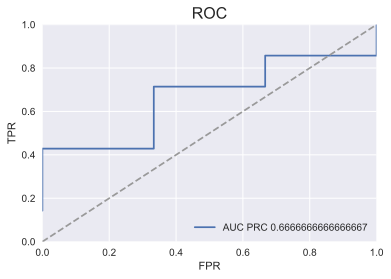

In [13]:
fpr, tpr, _ = roc_curve(y_true, y_proba)
plt.plot(fpr, tpr, label='AUC PRC {0}'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC', size=16)
plt.legend(loc='lower right')
plt.show()

### Видно, что кривые идентичны и ROC_AUC посчитан верно. 